### 1 数据分析
#### 1.1 数据分析目的
该数据集的主题是一系列关于疾病的调查，其中地理位置、受调查人的个人情况也囊括在内，我认为其最终目的为在给定环境和人员基本情况下，预测他们的患病概率，以对他们的健康生活做出指导。首先需要先观察数据。
#### 1.2 数据摘要
该数据集为csv格式，可以非常方便利用csv相关的函数对表头进行读取，以获取数据集包含的信息。

In [5]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
# dataPath = "G:\\gmt\\data_mining\\homework2\\dataset"
dataPath = "C:\\Users\\gui\\Desktop\\homework2\\dataset"

In [6]:
with open(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv","r",encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print(header)
    print("属性列共有{}".format(len(header)))
    df = pd.read_csv(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv",header = 0)

['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
属性列共有29


F:\Python\Python38\Lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


可以看到数据集包含非常多列，观察它们，我们可以粗略地对相关的数据列进行分类：
1. 数据收集时间(2)：YearStart,YearEnd
2. 数据收集位置(4)：LocationAbbr,LocationDesc(前两项分别是地理位置的简写和称);Geolocation;LocationID(它们都代表了具体的位置和对应id)
3. 疾病类型(6)：Class,ClassID;Topic,TopicID;Question,QuestionID(研究的健康问题、主题、具体研究问题)
4. 疾病评估数值(7)：Data_Value_Unit,DataValueTypeID,Data_Value_Type(有关数据的形式);Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
5. 研究对象属性(8)：StratificationCategoryID1,StratificationCategory1,StratificationID1,Stratification1(属性1和对应值);
               StratificationCategoryID2,StratificationCategory2,StratificationID2,Stratification2(属性2和对应值)
6. 数据来源(1):DataSource
7. 其他(1)：Sample_Size
接下来分别对各类数据的基本情况进行分析。

In [7]:
na_columns = df.loc[:, (df.isnull().any())].columns

##### 1.2.1 数据收集时间、收集位置、数据来源
首先对数据收集时间、收集位置、数据来源各自的数据分布进行一定的可视化分析。
（1） 数据收集时间

In [8]:
df["YearStart"] = df["YearStart"].values.astype(int)
print(df["YearStart"].describe())

count    214462.000000
mean       2017.378477
std           1.779822
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2020.000000
Name: YearStart, dtype: float64


In [9]:
df["YearEnd"] = df["YearEnd"].values.astype(int)
print(df["YearEnd"].describe())

count    214462.000000
mean       2017.634000
std           1.778926
min        2015.000000
25%        2016.000000
50%        2018.000000
75%        2019.000000
max        2020.000000
Name: YearEnd, dtype: float64


In [10]:
# TODO：这里需要先统计数量，然后再写成词典，然后再绘图
year = {}
for i in range(0,len(df["YearStart"])):
    if df["YearStart"][i] in year:
        if df["YearEnd"][i] in year[df["YearStart"][i]]:
            year[df["YearStart"][i]][df["YearEnd"][i]] += 1
        else:
            year[df["YearStart"][i]][df["YearEnd"][i]] = 1
    else:
        year[df["YearStart"][i]] = {}
        if df["YearEnd"][i] in year[df["YearStart"][i]]:
            year[df["YearStart"][i]][df["YearEnd"][i]] += 1
        else:
            year[df["YearStart"][i]][df["YearEnd"][i]] = 1
print(year)

{2020: {2020: 36006}, 2017: {2017: 33429}, 2018: {2018: 30548}, 2019: {2019: 34354}, 2015: {2015: 35020, 2020: 10960}, 2016: {2016: 34145}}


In [11]:
year_order = [(k,year[k]) for k in sorted(year.keys())]
# print(year_order)

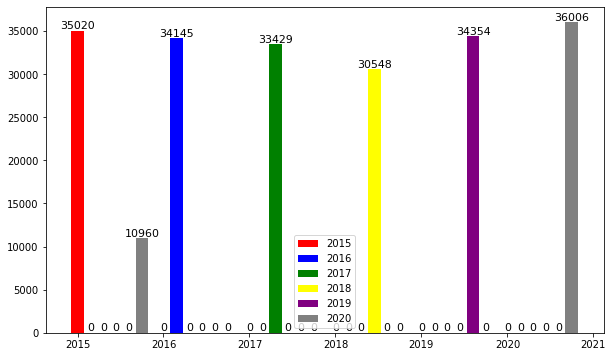

In [12]:
width = 0.15
posMove = 0
color = {2015:"red",2016:"blue",2017:"green",2018:"yellow",2019:"purple",2020:"grey"}
x = []
y = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
for key,item in year_order:
    x.append(key)
    for endYear,num in item.items():
        y[endYear-2015][key-2015] = num
# print(y)
plt.figure(figsize=(10,6))
for data in range(0,len(y)):
    realYear = data+2015
    plt.bar([i+posMove*width for i in x],y[data],width=0.15,color=color[data+2015],label=str(realYear))
    posMove += 1
    for a,b in zip(x,y[data]):
        plt.text(a+posMove*width-0.15, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.legend()
plt.show()

以开始时间开始为横坐标，探究调查持续时间可以发现，除2015年以外，其余疾病调查均为1年内数据；而2015年开始的调查中，有10960条持续了5年（至2020年终止）。且可以发现，这两列数据并无缺失值和错误值（即开始时间大于结束时间）。

（2）数据收集位置
首先分析该数据是否存在缺失值和错误值，该数据可能出现的错误值情况为ID、位置简写和位置全称不对应的情况。

In [13]:
# 数据值是否有缺失,总数据条数为214462条
# LocationAbbr,LocationDesc;Geolocation;LocationID
missLocAbbr = 0
for dat in df["LocationAbbr"]:
    if dat == "":
        missLocAbbr += 1
print(missLocAbbr)

missLocDesc = 0
for dat in df["LocationDesc"]:
    if dat == "":
        missLocDesc += 1
print(missLocDesc)

missLocGeo = 0
for dat in df["Geolocation"]:
    if dat == "":
        missLocGeo += 1
print(missLocGeo)

missLocID = 0
for dat in df["LocationID"]:
    if dat == "":
        missLocID += 1
print(missLocID)

0
0
0
0


观察结果，发现地理位置无缺失值，然后统计调查位置分布和ID与位置的对应关系，分析数据是否存在错误值，以下代码运行后，可以发现全称和简写、具体地理位置坐标和ID均为一一对应，无错误;接下来判断具体地理坐标ID是否与地区一一对应，均为一一对应。

In [14]:
locDic = {}
locGeoDic = {}
locIDDescDic = {}
# 记录错误数据行数
# locDic = {"位置全称":"简写"}
wrongData = []
for line in range(0,214462):
    locDesc = df["LocationDesc"][line]
    locAbbr = df["LocationAbbr"][line]
    locID = df["LocationID"][line]
    locGeo = df["Geolocation"][line]

    if locDesc in locDic:
        if locAbbr != locDic[locDesc]:
            wrongData.append(line)
    else:
        locDic[locDesc] = locAbbr

    if locID in locGeoDic:
        if locGeo not in locGeoDic[locID]:
            locGeoDic[locID].append(locGeo)
            wrongData.append(line)
    else:
        locGeoDic[locID] = [locGeo]

    if locID in locIDDescDic:
        if locDesc not in locIDDescDic[locID]:
            locIDDescDic[locID].append(locDesc)
            wrongData.append(line)
    else:
        locIDDescDic[locID] = [locDesc]


print("错误对应的数量为：{}".format(len(wrongData)))
# print(locGeoDic)

错误对应的数量为：0


判断完是否有缺失值后，对调查案例的地区分布进行简单的分析。可以发现大部分区域均选取约3000人进行跟进调查，而Virgin Island跟踪调查人物较少。

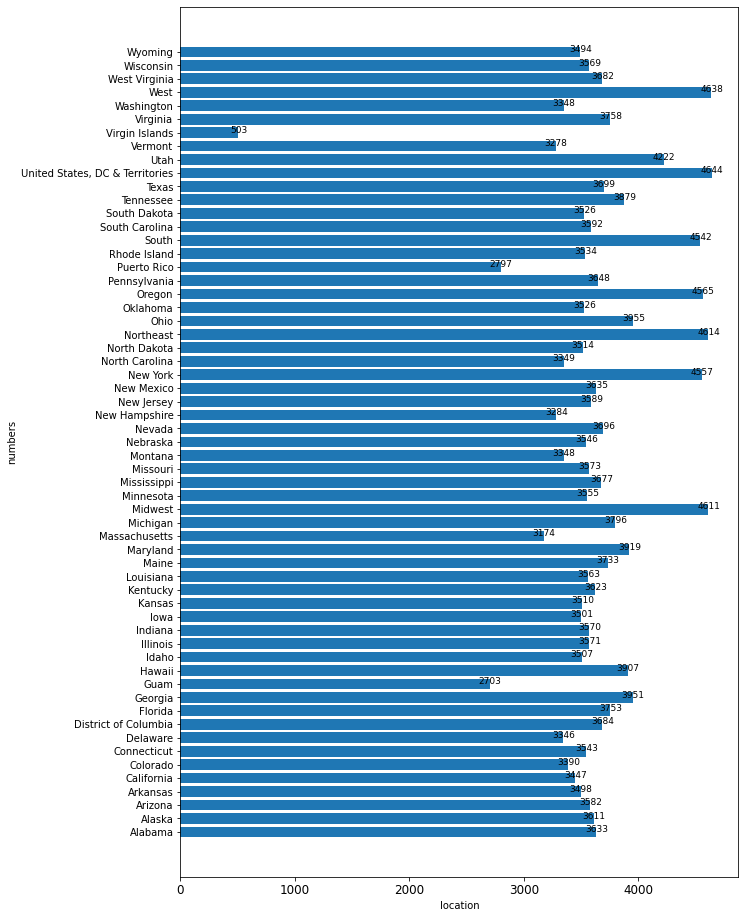

In [15]:
dicLoc = {}
for line in range(0, 214462):
    locDesc = df["LocationDesc"][line].strip("\n")
    if locDesc in dicLoc:
        dicLoc[locDesc] += 1
    else:
        dicLoc[locDesc] = 1
dicLoc_order = {}
for j in sorted(dicLoc.keys()):
    dicLoc_order[j] = dicLoc[j]
# print(dicLoc_order)
plt.figure(figsize=(10,16))
plt.xlabel("location")

plt.xticks(fontsize=12)
plt.ylabel("numbers")
x = list(dicLoc_order.keys())
y = list(dicLoc_order.values())
# print(x)
for a, b in zip(x,y):
     plt.text(b+4,a, '%.0f' % b, horizontalalignment='center', fontsize=9)
plt.barh(x,y,height=0.8)
plt.show()

（3） 疾病类型(6)：Class,ClassID;Topic,TopicID;Question,QuestionID(研究的健康问题、主题、具体研究问题)
疾病类型的处理逻辑和地理位置的处理逻辑一致，不过多赘述，结果发现仍无错误对应关系

In [16]:
disClassDic = {}
disTopicDic = {}
disQuesDic = {}
# 记录错误数据行数
wrongData = []
for line in range(0,214462):
    disClass = df["Class"][line]
    disClassID = df["ClassID"][line]
    disTopic = df["Topic"][line]
    disTopicID = df["TopicID"][line]
    disQues = df["Question"][line]
    disQuesID = df["QuestionID"][line]

    if disClassID in disClassDic:
        if disClass not in disClassDic[disClassID]:
            disClassDic[disClassID].append(disClass)
            wrongData.append(line)
    else:
        disClassDic[disClassID] = [disClass]

    if disTopicID in disTopicDic:
        if disTopic not in disTopicDic[disTopicID]:
            disTopicDic[disTopicID].append(disTopic)
            wrongData.append(line)
    else:
        disTopicDic[disTopicID] = [disTopic]

    if disQuesID in disQuesDic:
        if disQues not in disQuesDic[disQuesID]:
            disQuesDic[disQuesID].append(disQues)
            wrongData.append(line)
    else:
        disQuesDic[disQuesID] = [disQues]


print("错误对应的数量为：{}".format(len(wrongData)))

错误对应的数量为：0


接下来将对研究课题数量进行一定的分析。取研究大类作为横坐标，分析研究大类中不同主题的数量；以及以不同主题为横坐标，研究不同主题研究的不同问题的方向。发现问题与主题一一对应，而不同大类中存在着许多的主题，其分布大致平均。

In [17]:
dicClassTopic = {}
dicTopicQues = {}
for line in range(0,214462):
    disClass = df["Class"][line]
    disTopic = df["Topic"][line]
    disQuesID = df["QuestionID"][line]
    if disClass in dicClassTopic:
        if disTopic in dicClassTopic[disClass]:
            dicClassTopic[disClass][disTopic] += 1
        else:
            dicClassTopic[disClass][disTopic] = 1
    else:
        dicClassTopic[disClass] = {}
        dicClassTopic[disClass][disTopic] = 1

    if disTopic in dicTopicQues:
        if disQuesID in dicTopicQues[disTopic]:
            dicTopicQues[disTopic][disQuesID] += 1
        else:
            dicTopicQues[disTopic][disQuesID] = 1
    else:
        dicTopicQues[disTopic] = {}
        dicTopicQues[disTopic][disQuesID] = 1

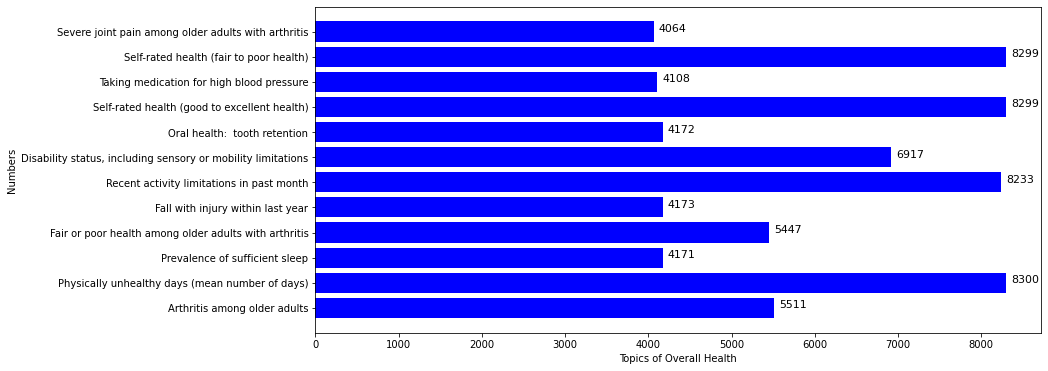

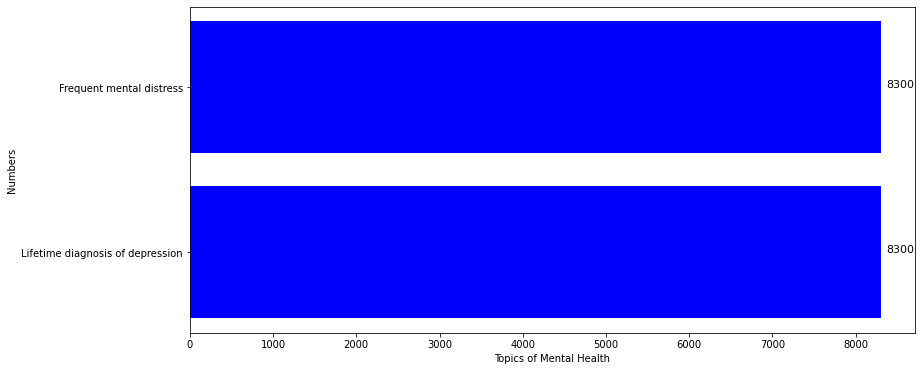

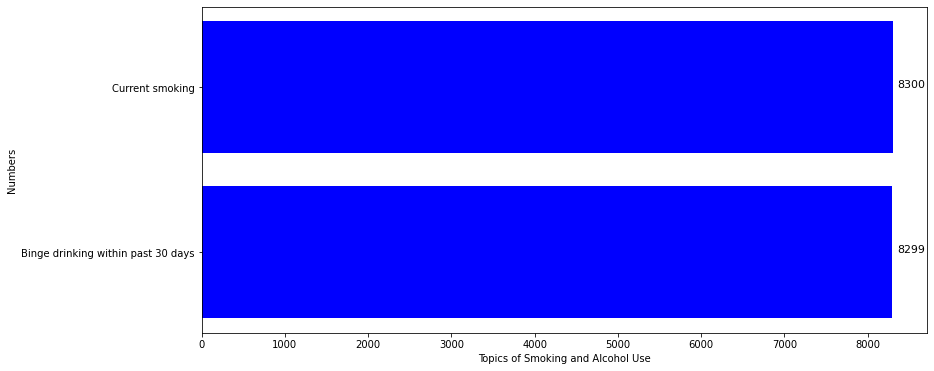

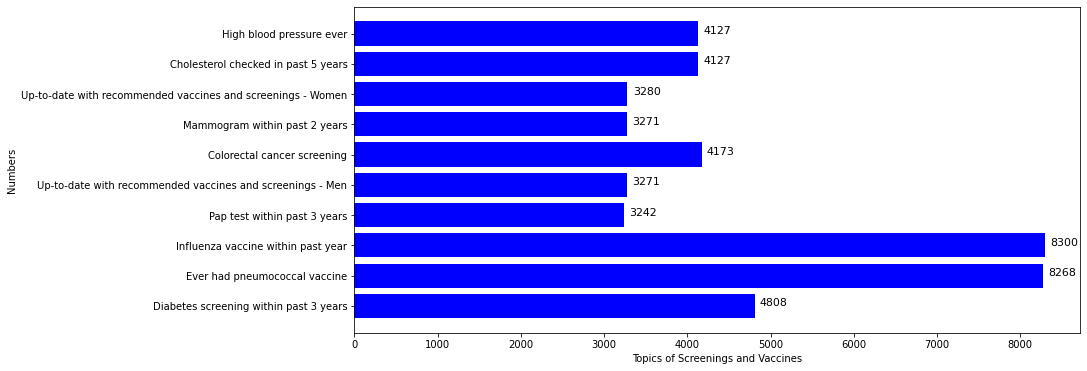

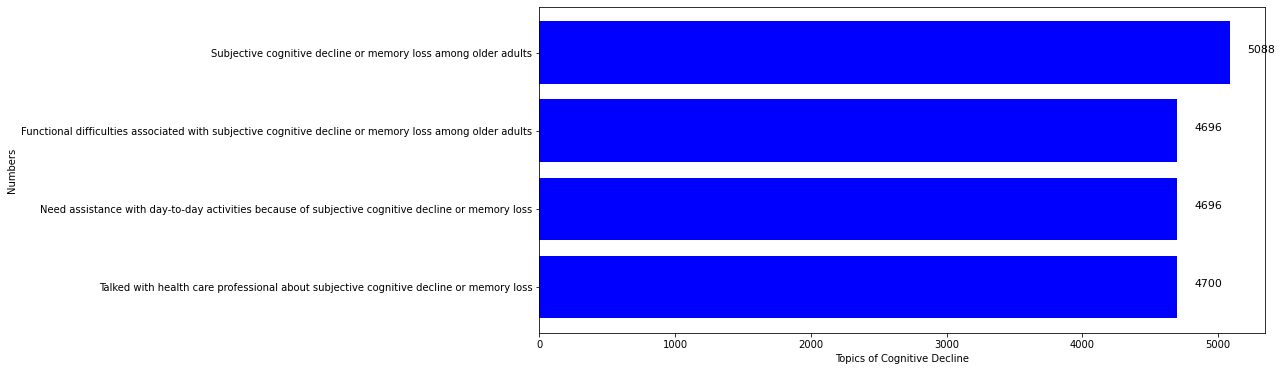

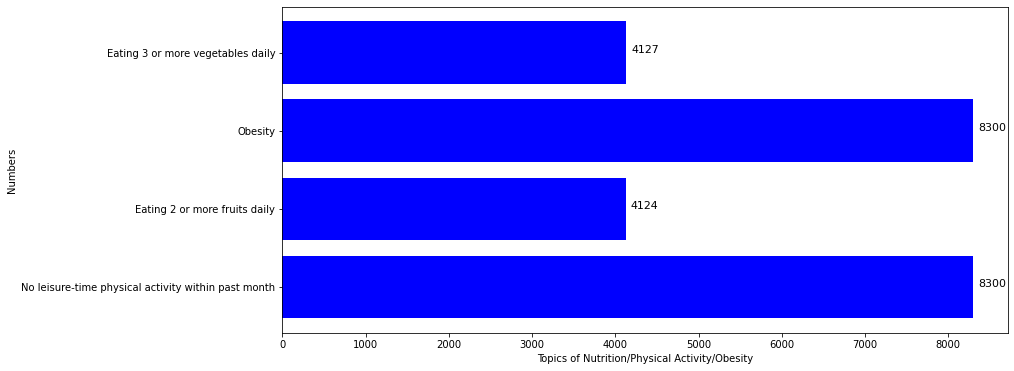

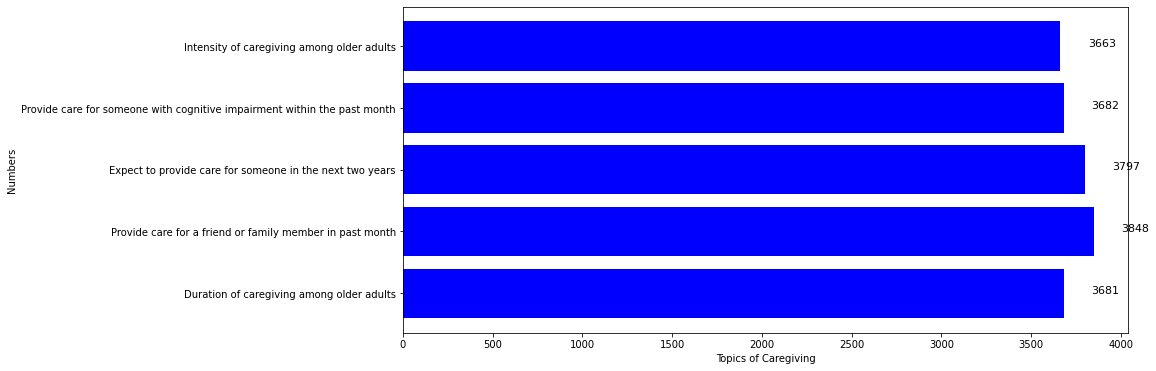

In [18]:
width = 0.15
for key in dicClassTopic.keys():
    plt.figure(figsize=(13,6))
    # plt.xticks(rotation=-20)
    plt.xlabel("Topics of {}".format(key))
    plt.ylabel("Numbers")
    for a,b in zip(dicClassTopic[key].keys(),dicClassTopic[key].values()):
        plt.text(b+230, a,'%.0f' % b, ha='center',fontsize=11)
    plt.barh(list(dicClassTopic[key].keys()), dicClassTopic[key].values(),color='b',height=0.8)
    plt.show()

<BarContainer object of 12 artists>

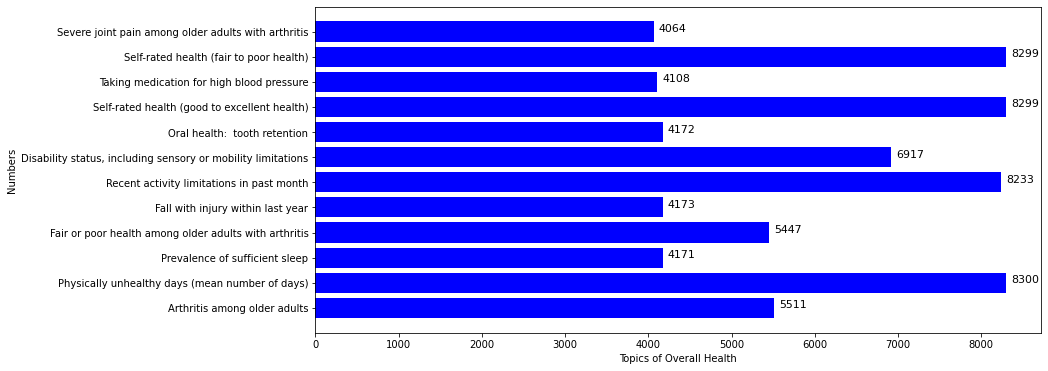

In [19]:
width = 0.15
plt.figure(figsize=(13,6))
# plt.xticks(rotation=-20)
plt.xlabel("Topics of Overall Health")
plt.ylabel("Numbers")
for a,b in zip(dicClassTopic["Overall Health"].keys(),dicClassTopic["Overall Health"].values()):
    plt.text(b+230, a,'%.0f' % b, ha='center',fontsize=11)
plt.barh(list(dicClassTopic["Overall Health"].keys()), dicClassTopic["Overall Health"].values(),color='b')

（4）疾病评估数值(7)：
Data_Value_Unit,DataValueTypeID,Data_Value_Type(有关数据的形式)
疾病评估形式等处理逻辑如上所示，同样发现无缺失和错误对应值。
Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
而观察原始数据，发现有关数字的数值有明显缺失，统计分析其缺失属性所属课题和地区，以为接下来的数据缺失处理打下基础。

In [20]:
dfDataValue = pd.DataFrame([df["Data_Value"],df["Data_Value_Alt"],df["Low_Confidence_Limit"],df["High_Confidence_Limit"]])

In [21]:
missDataValue = []
for line in range(0,len(df["Data_Value"])):
    if not pd.notnull(dfDataValue[line]["Data_Value"]):
        missDataValue.append(line)
# print(missDataValue)
print("缺失属性值个数为:{}，占全部数据的{}".format(len(missDataValue),len(missDataValue)/214462))

缺失属性值个数为:69833，占全部数据的0.32561945705999196


发现属性缺失值约有32%，此处需要建立模型拟合，从而填补空缺值。
对于离群点的处理，需要先绘制盒图，并采用五点法观察其特征,此处分析参见2.3小节。

（5）研究对象属性
StratificationCategoryID1,StratificationCategory1,StratificationID1,Stratification1(属性1和对应值)
StratificationCategoryID2,StratificationCategory2,StratificationID2,Stratification2(属性2和对应值)
首先初步观察数据可以得知，属性1和属性2均为调查对象属性，即使有缺失值也无法采用模型预测（调查对象并不符合一定的原则标准，性别和种族无法通过患病率预测），因此对于单列缺失值的处理方式为简单填充Unknown，若存在数据2个属性均缺失，需要综合该数据其他缺失值进行进一步评估和处理。

In [22]:
dicStr = {}
missStratification = [[],[]]
# dicStr = {“cateID":{"name":,"attr":{"ID":值}}}
for line in range(0,214462):
    strCate1 = df["StratificationCategory1"][line]
    strCateID1 = df["StratificationCategoryID1"][line]
    str1 = df["Stratification1"][line]
    strID1 = df["StratificationID1"][line]
    strCate2 = df["StratificationCategory2"][line]
    strCateID2 = df["StratificationCategoryID2"][line]
    str2 = df["Stratification2"][line]
    strID2 = df["StratificationID2"][line]

    if pd.notnull(strCate1):
        if strCateID1 in dicStr:
            if strID1 not in dicStr[strCateID1]["attr"]:
                dicStr[strCateID1]["attr"][strID1] = str1
            elif str1 != dicStr[strCateID1]["attr"][strID1]:
                missStratification.append(line)
        else:
            dicStr[strCateID1] = {}
            dicStr[strCateID1]["name"] = strCate1
            dicStr[strCateID1]["attr"] = {}
            dicStr[strCateID1]["attr"][strID1] = str1
    else:
        missStratification[0].append(line)

    if pd.notnull(strCate2):
        if strCateID2 in dicStr:
            if strID2 not in dicStr[strCateID2]["attr"]:
                dicStr[strCateID2]["attr"][strID2] = str2
            elif str2 != dicStr[strCateID2]["attr"][strID2]:
                missStratification.append(line)
        else:
            dicStr[strCateID2] = {}
            dicStr[strCateID2]["name"] = strCate2
            dicStr[strCateID2]["attr"] = {}
            dicStr[strCateID2]["attr"][strID2] = str2
    else:
        missStratification[1].append(line)

可以发现属性2有27669条缺失值，约占全部数据条数的13%左右，对于这些缺失值暂时不做处理。

（6）数据来源和其他
仅剩的DataSource和Sample_Size放到一起进行分析

In [24]:
missData = [[],[]]
dicOther = {"Datasource":[],"Sample_Size":[]}
for line in range(0,214462):
    if pd.notnull(df["Datasource"][line]):
        if df["Datasource"][line] not in dicOther["Datasource"]:
            dicOther["Datasource"].append(df["Datasource"][line])
    else:
        missData[0].append(line)

    if pd.notnull(df["Sample_Size"][line]) and df["Sample_Size"][line] not in dicOther["Sample_Size"]:
         dicOther["Sample_Size"].append(df["Sample_Size"][line])
    else:
        missData[1].append(line)

In [25]:
print(dicOther)
print(len(missData[0]))
print(len(missData[1]))

{'Datasource': ['BRFSS'], 'Sample_Size': []}
0
214462


可以发现Datasource来源单一，且Sample_Size列为数据完全缺失的列，因此删除Sample_Size列。

#### 1.3 数据总结
在1.2对数据情况进行分析后，可以发现部分数据存在缺失：
① 患病率和置信区间：缺失约32%左右，需建立模型进行拟合，填补缺失值
② 调查对象属性2：缺失约13%左右，无法采取有效方式填补缺失值（由于性别和种族无法被有效预测），使用Unknown填补所有缺失值
③ 数据样本尺寸：缺失值为100%，删除该列

### 2 数据缺失处理办法
#### 2.1 Sample_Size
该数据列100%缺失，予以去除，其具体方法为去除DataFrame中的Sample_Size列，可以看到已经成功地删除了Sample_Size列

In [26]:
dfCopy = df.copy()

In [27]:
try:
    dfCopy = dfCopy.drop('Sample_Size',axis='columns')
except KeyError as error:
    print(error)
print(dfCopy.head(0))

Empty DataFrame
Columns: [YearStart, YearEnd, LocationAbbr, LocationDesc, Datasource, Class, Topic, Question, Data_Value_Unit, DataValueTypeID, Data_Value_Type, Data_Value, Data_Value_Alt, Low_Confidence_Limit, High_Confidence_Limit, StratificationCategory1, Stratification1, StratificationCategory2, Stratification2, Geolocation, ClassID, TopicID, QuestionID, LocationID, StratificationCategoryID1, StratificationID1, StratificationCategoryID2, StratificationID2]
Index: []

[0 rows x 28 columns]


#### 2.2 Stratification2,StratificationID2
简单采取StratificationCategory2填充Attrib,Stratification2填充Unknown方式填补缺失值

In [28]:
dfCopy['StratificationCategory2'].fillna("Attrib", inplace=True)
dfCopy['Stratification2'].fillna("Unknown", inplace=True)

#### 2.3 Data_Value,Data_Value_Alt(有关数值);Low_Confidence_Limit,High_Confidence_Limit(数据的置信度)
这些数据列缺失值较多，需要先观察缺失数据的属性。研究对象有年份、地区、年龄、第二属性（性别或种族或未知），需要先进行研究问题的筛选后，探究这些属性对研究问题的影响。首先要计算属性相关性，根据相关情况进行填充。

In [29]:
# missDataValue列表中存放着缺失数据值的行编号
dicLossID = {}
for line in missDataValue:
    if dfCopy["QuestionID"][line] not in dicLossID:
        dicLossID[df["QuestionID"][line]] = [line]
    else:
        dicLossID[df["QuestionID"][line]].append(line)

In [30]:
print(dicLossID.keys())

dict_keys(['Q45', 'Q42', 'Q20', 'Q01', 'Q09', 'Q13', 'Q04', 'Q32', 'Q03', 'Q15', 'Q10', 'Q17', 'Q07', 'Q36', 'Q31', 'Q19', 'Q38', 'Q02', 'Q35', 'Q41', 'Q40', 'Q21', 'Q39', 'Q08', 'Q27', 'Q44', 'Q22', 'Q43', 'Q12', 'Q30', 'Q34', 'Q11', 'Q05', 'Q46', 'Q16', 'Q14', 'Q18', 'Q33', 'Q37'])


对于不同问题而言，如果存在离群点，则将其全部处理为箱线图上限。

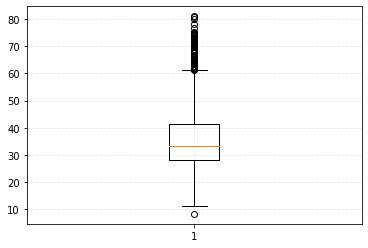

count    3566.000000
mean       35.683595
std        10.481523
min         8.200000
25%        28.225000
50%        33.200000
75%        41.400000
max        81.100000
Name: Data_Value, dtype: float64


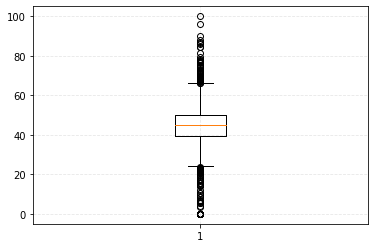

count    2846.000000
mean       44.884505
std        10.326218
min         0.000000
25%        39.600000
50%        45.100000
75%        50.200000
max       100.000000
Name: Data_Value, dtype: float64


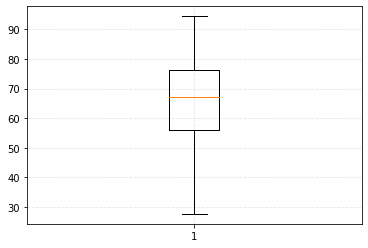

count    1800.000000
mean       64.862944
std        14.067458
min        27.700000
25%        55.875000
50%        67.050000
75%        76.300000
max        94.400000
Name: Data_Value, dtype: float64


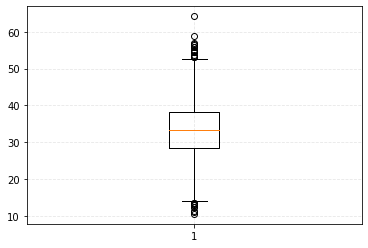

count    2923.000000
mean       33.195587
std         7.394349
min        10.500000
25%        28.400000
50%        33.400000
75%        38.200000
max        64.200000
Name: Data_Value, dtype: float64


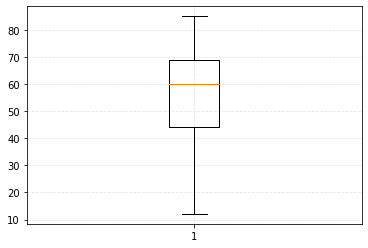

count    5676.000000
mean       56.967107
std        14.467086
min        12.100000
25%        44.200000
50%        59.950000
75%        69.000000
max        85.000000
Name: Data_Value, dtype: float64


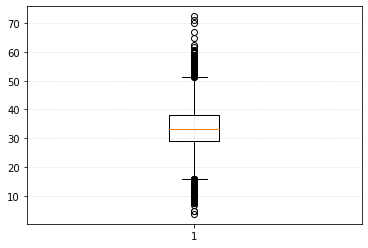

count    5889.000000
mean       33.712107
std         7.403783
min         3.700000
25%        29.200000
50%        33.300000
75%        38.000000
max        72.400000
Name: Data_Value, dtype: float64


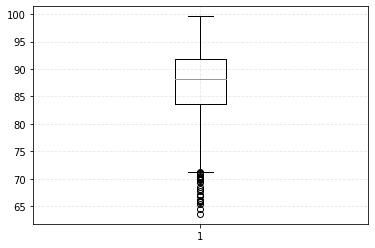

count    2796.000000
mean       87.228147
std         5.805997
min        63.600000
25%        83.600000
50%        88.100000
75%        91.800000
max        99.600000
Name: Data_Value, dtype: float64


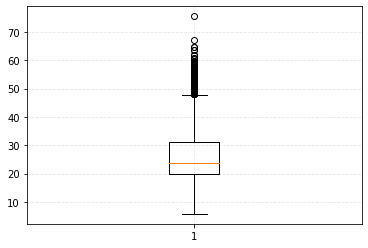

count    5943.000000
mean       26.113764
std         9.024055
min         5.800000
25%        19.700000
50%        23.900000
75%        31.000000
max        75.500000
Name: Data_Value, dtype: float64


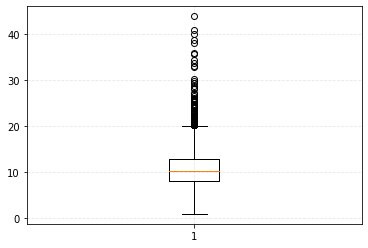

count    5290.000000
mean       10.769187
std         3.958634
min         0.900000
25%         8.000000
50%        10.300000
75%        12.800000
max        43.800000
Name: Data_Value, dtype: float64


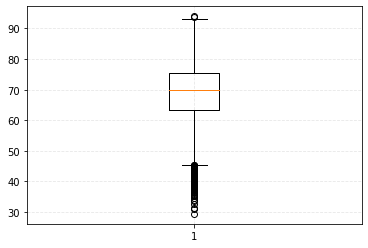

count    3004.000000
mean       68.759188
std        10.051953
min        29.400000
25%        63.400000
50%        69.800000
75%        75.400000
max        94.000000
Name: Data_Value, dtype: float64


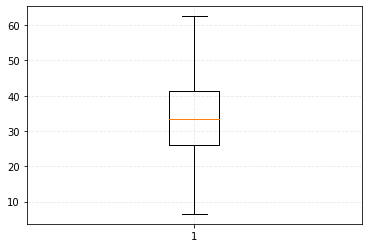

count    1848.000000
mean       33.902273
std        10.242121
min         6.500000
25%        25.900000
50%        33.400000
75%        41.425000
max        62.500000
Name: Data_Value, dtype: float64


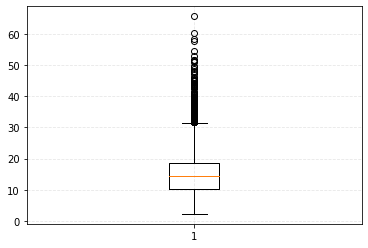

count    5476.000000
mean       15.334642
std         6.896966
min         2.300000
25%        10.200000
50%        14.300000
75%        18.725000
max        65.600000
Name: Data_Value, dtype: float64


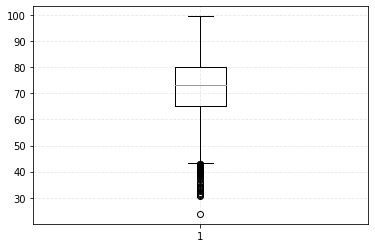

count    3071.000000
mean       71.860567
std        11.054723
min        23.800000
25%        65.300000
50%        73.200000
75%        80.100000
max        99.500000
Name: Data_Value, dtype: float64


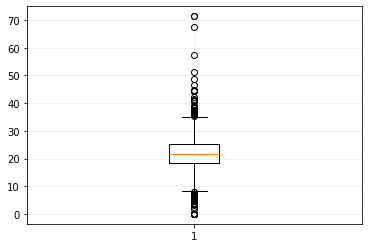

count    2723.000000
mean       21.725193
std         5.827222
min         0.000000
25%        18.300000
50%        21.700000
75%        25.100000
max        71.400000
Name: Data_Value, dtype: float64


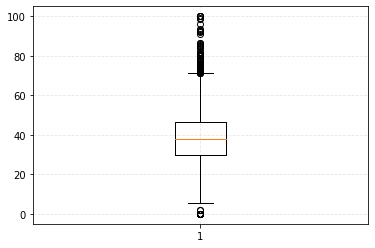

count    2796.000000
mean       39.119349
std        13.608189
min         0.000000
25%        29.875000
50%        37.700000
75%        46.500000
max       100.000000
Name: Data_Value, dtype: float64


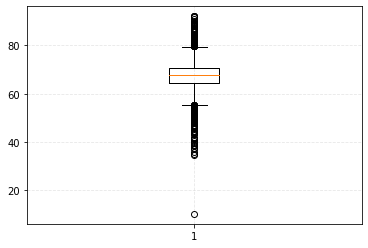

count    3426.000000
mean       67.237186
std         6.258141
min        10.200000
25%        64.500000
50%        67.600000
75%        70.500000
max        92.100000
Name: Data_Value, dtype: float64


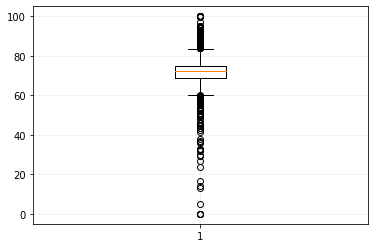

count    2483.000000
mean       71.551389
std         7.782562
min         0.000000
25%        68.950000
50%        72.100000
75%        74.800000
max       100.000000
Name: Data_Value, dtype: float64


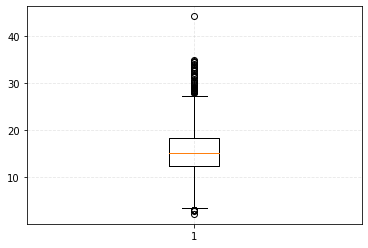

count    2675.000000
mean       15.565196
std         4.710584
min         2.200000
25%        12.300000
50%        15.100000
75%        18.300000
max        44.200000
Name: Data_Value, dtype: float64


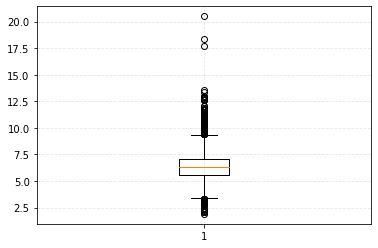

count    5495.000000
mean        6.456178
std         1.352018
min         1.900000
25%         5.600000
50%         6.300000
75%         7.100000
max        20.500000
Name: Data_Value, dtype: float64


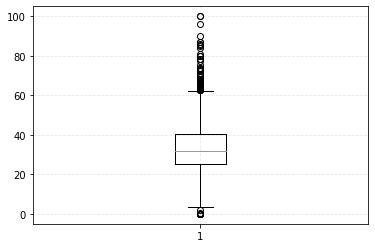

count    2775.000000
mean       33.604649
std        12.357651
min         0.000000
25%        25.350000
50%        31.900000
75%        40.200000
max       100.000000
Name: Data_Value, dtype: float64


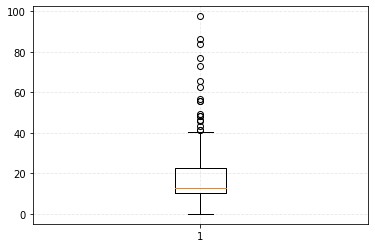

count    2171.000000
mean       16.183924
std         9.350158
min         0.000000
25%        10.200000
50%        12.700000
75%        22.500000
max        97.600000
Name: Data_Value, dtype: float64


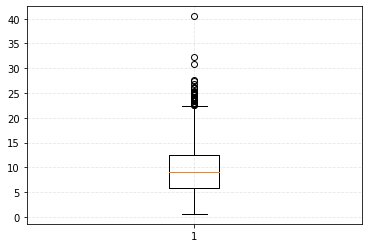

count    4970.000000
mean        9.463581
std         4.598300
min         0.600000
25%         5.800000
50%         9.100000
75%        12.500000
max        40.500000
Name: Data_Value, dtype: float64


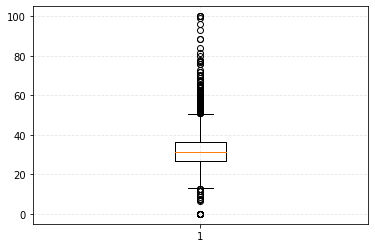

count    2453.000000
mean       32.616429
std        10.368732
min         0.000000
25%        27.000000
50%        31.500000
75%        36.500000
max       100.000000
Name: Data_Value, dtype: float64


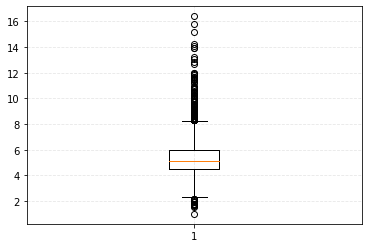

count    5872.000000
mean        5.344057
std         1.350386
min         1.000000
25%         4.500000
50%         5.100000
75%         6.000000
max        16.400000
Name: Data_Value, dtype: float64


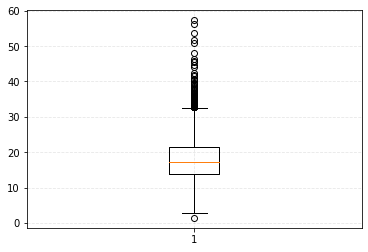

count    5590.000000
mean       18.029678
std         5.939141
min         1.400000
25%        13.900000
50%        17.300000
75%        21.400000
max        57.300000
Name: Data_Value, dtype: float64


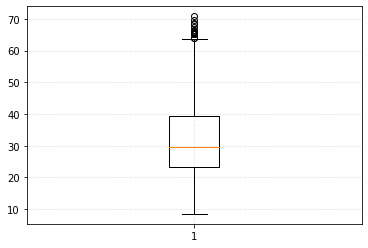

count    2649.000000
mean       32.201661
std        11.580639
min         8.500000
25%        23.300000
50%        29.600000
75%        39.500000
max        70.800000
Name: Data_Value, dtype: float64


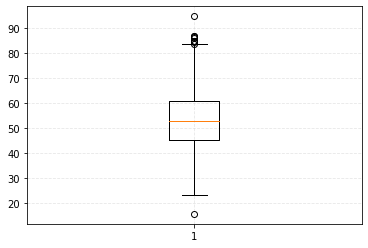

count    3025.000000
mean       53.174512
std        10.864448
min        15.500000
25%        45.300000
50%        52.900000
75%        60.600000
max        94.700000
Name: Data_Value, dtype: float64


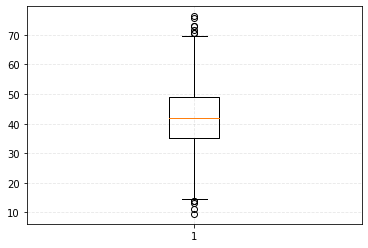

count    3997.000000
mean       41.845609
std         9.657184
min         9.500000
25%        35.000000
50%        41.900000
75%        48.900000
max        76.300000
Name: Data_Value, dtype: float64


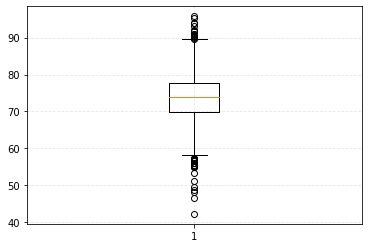

count    1940.000000
mean       73.798402
std         6.573670
min        42.200000
25%        69.800000
50%        73.800000
75%        77.700000
max        95.800000
Name: Data_Value, dtype: float64


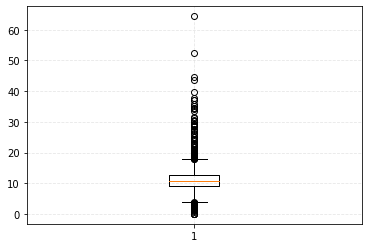

count    3260.000000
mean       11.124233
std         3.849154
min         0.000000
25%         9.100000
50%        10.800000
75%        12.600000
max        64.400000
Name: Data_Value, dtype: float64


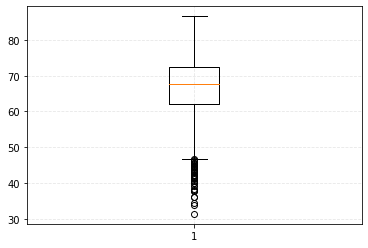

count    3076.000000
mean       66.753414
std         7.697425
min        31.400000
25%        62.100000
50%        67.600000
75%        72.400000
max        86.600000
Name: Data_Value, dtype: float64


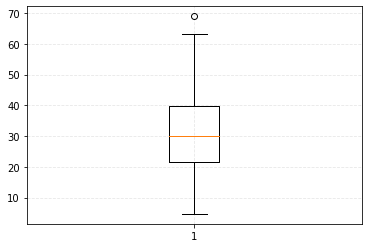

count    1860.000000
mean       30.955161
std        11.898217
min         4.700000
25%        21.575000
50%        30.000000
75%        39.800000
max        69.000000
Name: Data_Value, dtype: float64


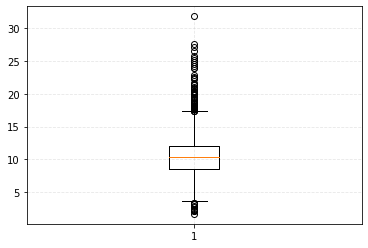

count    2587.000000
mean       10.595555
std         3.008363
min         1.700000
25%         8.600000
50%        10.300000
75%        12.100000
max        31.800000
Name: Data_Value, dtype: float64


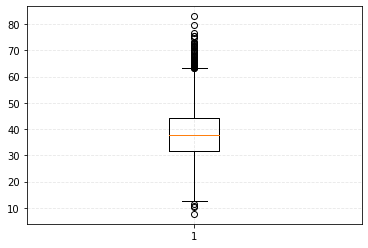

count    5020.000000
mean       38.331673
std         9.801904
min         7.700000
25%        31.500000
50%        37.900000
75%        44.200000
max        83.000000
Name: Data_Value, dtype: float64


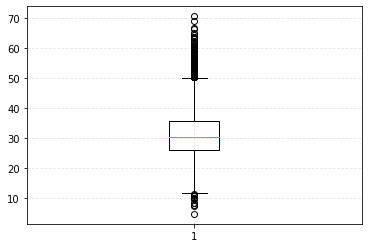

count    5961.000000
mean       31.143818
std         7.601769
min         4.700000
25%        25.900000
50%        30.300000
75%        35.600000
max        70.500000
Name: Data_Value, dtype: float64


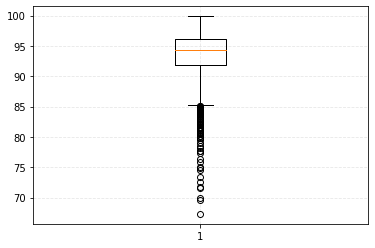

count    3007.000000
mean       93.548819
std         3.719213
min        67.300000
25%        91.800000
50%        94.300000
75%        96.200000
max        99.900000
Name: Data_Value, dtype: float64


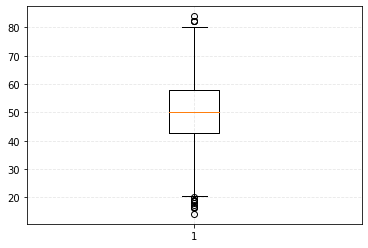

count    6017.000000
mean       50.160379
std        10.391570
min        14.200000
25%        42.800000
50%        50.000000
75%        57.800000
max        83.900000
Name: Data_Value, dtype: float64


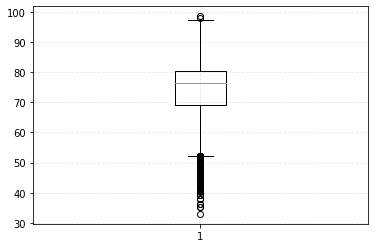

count    6110.000000
mean       74.189165
std         9.108032
min        33.000000
25%        69.200000
50%        76.300000
75%        80.500000
max        98.500000
Name: Data_Value, dtype: float64


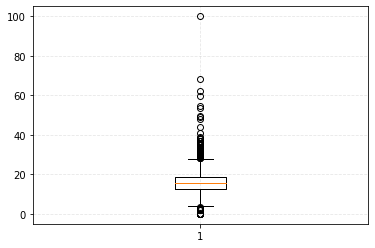

count    2563.000000
mean       16.095669
std         5.748859
min         0.000000
25%        12.700000
50%        15.600000
75%        18.800000
max       100.000000
Name: Data_Value, dtype: float64


In [31]:
for key in dicLossID.keys():
    quesID = key
    tempDf = df[(df.QuestionID == key)]
    # 获取了所有数据行之后，从中取出有数据值的数据，分别分析它们与年份、地区、年龄、第二属性的关系
    tempDfNotNull = tempDf[tempDf["Data_Value"].notna()]
    plt.boxplot(tempDfNotNull["Data_Value"])
    plt.grid(linestyle="--", alpha=0.3)
    plt.show()
    print(tempDfNotNull["Data_Value"].describe())

    iqr = tempDfNotNull["Data_Value"].describe()["75%"] - tempDfNotNull["Data_Value"].describe()["25%"]
    upLine = iqr*1.5 + tempDfNotNull["Data_Value"].describe()["75%"]
    downLine =  tempDfNotNull["Data_Value"].describe()["25%"] - iqr*1.5

In [32]:
dfCopy['Low_Confidence_Limit'] = pd.to_numeric(dfCopy['Low_Confidence_Limit'], errors='coerce')
dfCopy['High_Confidence_Limit'] = pd.to_numeric(dfCopy['High_Confidence_Limit'], errors='coerce')
corr_matrix = dfCopy.corr()

In [33]:
for column in na_columns[:4]:
    highest_corr = corr_matrix[column].sort_values(ascending=False).index[1]
    dfCopy[column].fillna(dfCopy[highest_corr].mean(), inplace=True)

对于剩余的属性（dataValue,dataValueAlt,low/highConfidence），可以找到最相似的行进行填充

In [39]:
for column in na_columns[:4]:
    dfCopy[column].fillna(dfCopy[column].mean(), inplace=True)

for column in na_columns[5:]:
    dfCopy[column].fillna(dfCopy[column].mode().iloc[0], inplace=True)

In [40]:
dfCopy.to_csv(dataPath+"\\alzheimer\\new Alzheimer.csv")

### 3 数据集处理前后对比
首先查看数据属性个数，可以看到处理后数据列数减少。

In [41]:
with open(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv","r",encoding="utf-8") as f:
    oldReader = csv.reader(f)
    oldReader = next(oldReader)
    oldDf = pd.read_csv(dataPath+"\\alzheimer\\Alzheimer Disease and Healthy Aging Data In US.csv",header = 0)
    print("原数据集共有{}列属性，分别是：".format(len(oldReader)))
    print(oldReader)

with open(dataPath+"\\alzheimer\\new Alzheimer.csv","r",encoding="utf-8") as f:
    newReader = csv.reader(f)
    newReader = next(newReader)
    newDf = pd.read_csv(dataPath+"\\alzheimer\\new Alzheimer.csv",header = 0)
    print("共有{}列属性，分别是：".format(len(newReader)))
    print(newReader)

F:\Python\Python38\Lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


原数据集共有29列属性，分别是：
['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
共有29列属性，分别是：
['', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'Stratifi

In [42]:
print("旧数据集缺失率：")
print((oldDf.isnull().sum())/oldDf.shape[0])

旧数据集缺失率：
YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
Datasource                   0.000000
Class                        0.000000
Topic                        0.000000
Question                     0.000000
Data_Value_Unit              0.000000
DataValueTypeID              0.000000
Data_Value_Type              0.000000
Data_Value                   0.325619
Data_Value_Alt               0.325619
Low_Confidence_Limit         0.326352
High_Confidence_Limit        0.326352
Sample_Size                  1.000000
StratificationCategory1      0.000000
Stratification1              0.000000
StratificationCategory2      0.129016
Stratification2              0.129016
Geolocation                  0.107474
ClassID                      0.000000
TopicID                      0.000000
QuestionID                   0.000000
LocationID                   0.000000
StratificationCategoryID1    0.000000
Str

In [43]:
print("新数据集缺失率：")
print((newDf.isnull().sum())/newDf.shape[0])

新数据集缺失率：
Unnamed: 0                   0.0
YearStart                    0.0
YearEnd                      0.0
LocationAbbr                 0.0
LocationDesc                 0.0
Datasource                   0.0
Class                        0.0
Topic                        0.0
Question                     0.0
Data_Value_Unit              0.0
DataValueTypeID              0.0
Data_Value_Type              0.0
Data_Value                   0.0
Data_Value_Alt               0.0
Low_Confidence_Limit         0.0
High_Confidence_Limit        0.0
StratificationCategory1      0.0
Stratification1              0.0
StratificationCategory2      0.0
Stratification2              0.0
Geolocation                  0.0
ClassID                      0.0
TopicID                      0.0
QuestionID                   0.0
LocationID                   0.0
StratificationCategoryID1    0.0
StratificationID1            0.0
StratificationCategoryID2    0.0
StratificationID2            0.0
dtype: float64
